In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
scores = pd.read_csv('StudentsPerformance.csv')
print(scores)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
5    female        group B          associate's degree      standard   
6    female        group B                some college      standard   
7      male        group B                some college  free/reduced   
8      male        group D                 high school  free/reduced   
9    female        group B                 high school  free/reduced   
10     male        group C          associate's degree      standard   
11     male        group D          associate's degree      standard   
12   female        group B                 high school      stan

In [41]:
scores.columns = [c.replace(' ', '_') for c in scores.columns]
scores

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [42]:
print('standard lunch avg math score: ', scores[scores.lunch == 'standard']['math_score'].mean())
print('free/reduced lunch avg math score: ', scores[scores.lunch == 'free/reduced']['math_score'].mean())
print()
print('standard lunch avg reading score: ', scores[scores.lunch == 'standard']['reading_score'].mean())
print('free/reduced lunch avg reading score: ', scores[scores.lunch == 'free/reduced']['reading_score'].mean())
print()
print('standard lunch avg writing score: ', scores[scores.lunch == 'standard']['writing_score'].mean())
print('free/reduced lunch avg writing score: ', scores[scores.lunch == 'free/reduced']['writing_score'].mean())

standard lunch avg math score:  70.03410852713178
free/reduced lunch avg math score:  58.92112676056338

standard lunch avg reading score:  71.65426356589147
free/reduced lunch avg reading score:  64.65352112676057

standard lunch avg writing score:  70.8232558139535
free/reduced lunch avg writing score:  63.02253521126761


In [43]:
stats.ttest_ind(scores[scores.lunch == 'standard']['writing_score'],
               scores[scores.lunch == 'free/reduced']['writing_score'])

Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)

In [44]:
stats.ttest_ind(scores[scores.lunch == 'standard']['reading_score'],
               scores[scores.lunch == 'free/reduced']['reading_score'])

Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)

In [45]:
stats.ttest_ind(scores[scores.lunch == 'standard']['math_score'],
               scores[scores.lunch == 'free/reduced']['math_score'])

Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)

In [52]:
std = scores[scores.lunch == 'standard']
print('Standard lunch students with no test prep: ', 
      len(std[std.test_preparation_course == 'none']))
print('Standard lunch students with test prep: ',
      len(std[std.test_preparation_course == 'completed']))

Standard lunch students with no test prep:  418
Standard lunch students with test prep:  227


In [54]:
free = scores[scores.lunch == 'free/reduced']
print('Free/reduced lunch students with no test prep: ',
      len(free[free.test_preparation_course == 'none']))
print('Free/reduced lunch students with test prep: ',
      len(free[free.test_preparation_course == 'completed']))

Free/reduced lunch students with no test prep:  224
Free/reduced lunch students with test prep:  131


In [60]:
print('Free/reduced lunch with test prepration avg math score: ',
      free[free.test_preparation_course == 'completed']['math_score'].mean())

Free/reduced lunch with test prepration avg math score:  63.045801526717554


In [61]:
print('Free/reduced lunch with no test prepration avg math score: ',
      free[free.test_preparation_course == 'none']['math_score'].mean())

Free/reduced lunch with no test prepration avg math score:  56.50892857142857


In [59]:
stats.ttest_ind(free[free.test_preparation_course == 'completed']['math_score'],
               free[free.test_preparation_course == 'none']['math_score'])

Ttest_indResult(statistic=4.002592150930039, pvalue=7.638442838727711e-05)

In [63]:
print('Standard lunch with test prepration avg math score: ',
      std[std.test_preparation_course == 'completed']['math_score'].mean())

Standard lunch with test prepration avg math score:  73.5330396475771


In [62]:
print('Standard lunch with no test prepration avg math score: ',
      std[std.test_preparation_course == 'none']['math_score'].mean())

Standard lunch with no test prepration avg math score:  68.13397129186603


In [64]:
stats.ttest_ind(std[std.test_preparation_course == 'completed']['math_score'],
               std[std.test_preparation_course == 'none']['math_score'])

Ttest_indResult(statistic=4.880416501622999, pvalue=1.3366120256480828e-06)

In [65]:
stats.ttest_ind(std[std.test_preparation_course == 'completed']['math_score'],
               free[free.test_preparation_course == 'completed']['math_score'])

Ttest_indResult(statistic=7.0544473109334325, pvalue=9.088258238939723e-12)

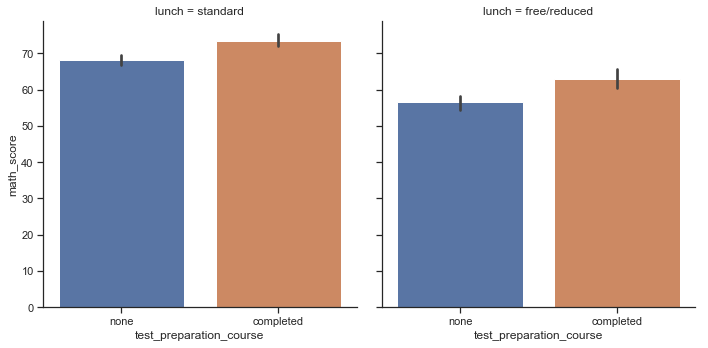

In [74]:
sns.set(style='ticks')
sns.catplot(x='test_preparation_course', y='math_score', col='lunch', data=scores, kind='bar')
plt.show()

# Analysis
While investigating the data for this school's test scores, I honed in on trying to find what differences there were depending on the lunch variable. For those not aware, students receive free/reduced price lunch based on if their family is considered to be at or below the poverty line. So the lunch variable is a viable stand-in for SES, or socio-economic status. When checking the scores, I found the means for all three tests (math, reading, and writing) to be greater for students with a standard lunch (those not in poverty/higher SES) than those receiving free/reduced lunch (those in poverty/lower SES). T-test analysis found the differences for all three tests to be extremely significant. 

I then turned my attention to what difference the test preparation being currently offered made for both these groups. I decided to focus my analysis on math scores, where the gap in means was largest between the lunch type groups. The mean was higher in lunch groups for students who received test preparation with high statistical significance. However, when comparing the standard lunch students who received test prep with the free/reduced lunch students who received the same test prep, there was still a statistically significant difference in favor of students with standard lunch. This was where I found my problem that I wanted to address. How can we close the gap in math scores between students with standard lunch (higher SES) and those with free/reduced lunch (lower SES)?

# Hypothesis
My hypothesis will be that a new mandatory test prep program designed to meet the needs of students with lower SES can close the gap and raise the average math scores of students with free/reduced lunch from 58 to 68. This would be within two points of the average math score for students with standard lunch. It would also be an increase of five points from the average score of 63 for students in this group who received the traditional test prep.

# Rollout Plan
We will begin by including an outline of the new expert-created test prep program, and a link to the entire program for more in-depth review. This way all involved parties can see exactly what tutoring will occur. The test prep will be a two month course, so the study will be for two months.

We will take all students who receive free and reduced lunch and split them in half through random assignment. This will be a 50/50 rollout. Students in the control group will mandatorily receive the traditional test prep that was already being offered. Students in the experiment group will mandatorily receive the newly improved test version. 

All of these students will receive the test prep at the same point in the day, sacrificing one of their classes for the course of the test prep study. 

Students will be given a pre-test before beginning the study as a baseline for comparison. For the sake of this plan, we will assume that the pre-test scores mirror the current data as no change has occurred yet.

# Evaluation Plan
The key metric will be the score for the math post-test given at the end of the program. We will compare the mean for the control and experiment group. Our goal is to have an increase in 5 points between the two groups and that it will be statistically significant to p=0.01.

Secondary metrics will include the reading and writing scores. We will investigate those to see if the intensive math test prep had an positive or negative effect on reading and writing scores. Does studying math skills help your testing skills in general? Or could focusing so much on math actually make reading and writing less a priority for students and hurt scores?